## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from scipy import stats

## Description

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases 

* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [2]:
df=pd.read_csv('CC GENERAL.csv')

In [3]:
dfc = df.copy()

In [4]:
dfc

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
for i in dfc.columns:
    print('Unique values in {} are {}'.format(i,len(dfc[i].unique())))

Unique values in CUST_ID are 8950
Unique values in BALANCE are 8871
Unique values in BALANCE_FREQUENCY are 43
Unique values in PURCHASES are 6203
Unique values in ONEOFF_PURCHASES are 4014
Unique values in INSTALLMENTS_PURCHASES are 4452
Unique values in CASH_ADVANCE are 4323
Unique values in PURCHASES_FREQUENCY are 47
Unique values in ONEOFF_PURCHASES_FREQUENCY are 47
Unique values in PURCHASES_INSTALLMENTS_FREQUENCY are 47
Unique values in CASH_ADVANCE_FREQUENCY are 54
Unique values in CASH_ADVANCE_TRX are 65
Unique values in PURCHASES_TRX are 173
Unique values in CREDIT_LIMIT are 206
Unique values in PAYMENTS are 8711
Unique values in MINIMUM_PAYMENTS are 8637
Unique values in PRC_FULL_PAYMENT are 47
Unique values in TENURE are 7


In [6]:
#checking if there are any duplicate rows if CUST_ID is dropped
dfc1= dfc.drop(['CUST_ID'],axis=1)
dfc1.drop_duplicates(inplace=True)
dfc1.shape

(8950, 17)

* There are no duplicate rows even if the "CUST_ID" feature is dropped.

In [7]:
#checking data types and missing values in columns
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

* Here is 1 missing value in CREDIT_LIMIT and 313 in MINIMUM_PAYMENTS.

In [8]:
dfc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


* It is clearly seen that data is skewed due to high difference in median and mean.

In [9]:
dfc.CREDIT_LIMIT.mode()

0    3000.0
dtype: float64

In [10]:
dfc.MINIMUM_PAYMENTS.mode()

0    299.351881
dtype: float64

In [11]:
# Handling missing values with most frequent value in that column
dfc['MINIMUM_PAYMENTS'].fillna(299.351881,inplace=True)
dfc['CREDIT_LIMIT'].fillna(3000.0,inplace=True)

In [12]:
# checking the missing values again
print(dfc['CREDIT_LIMIT'].isnull().sum())
print(dfc['MINIMUM_PAYMENTS'].isnull().sum())

0
0


In [13]:
dfc.TENURE.value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

### Visualization of dataset

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

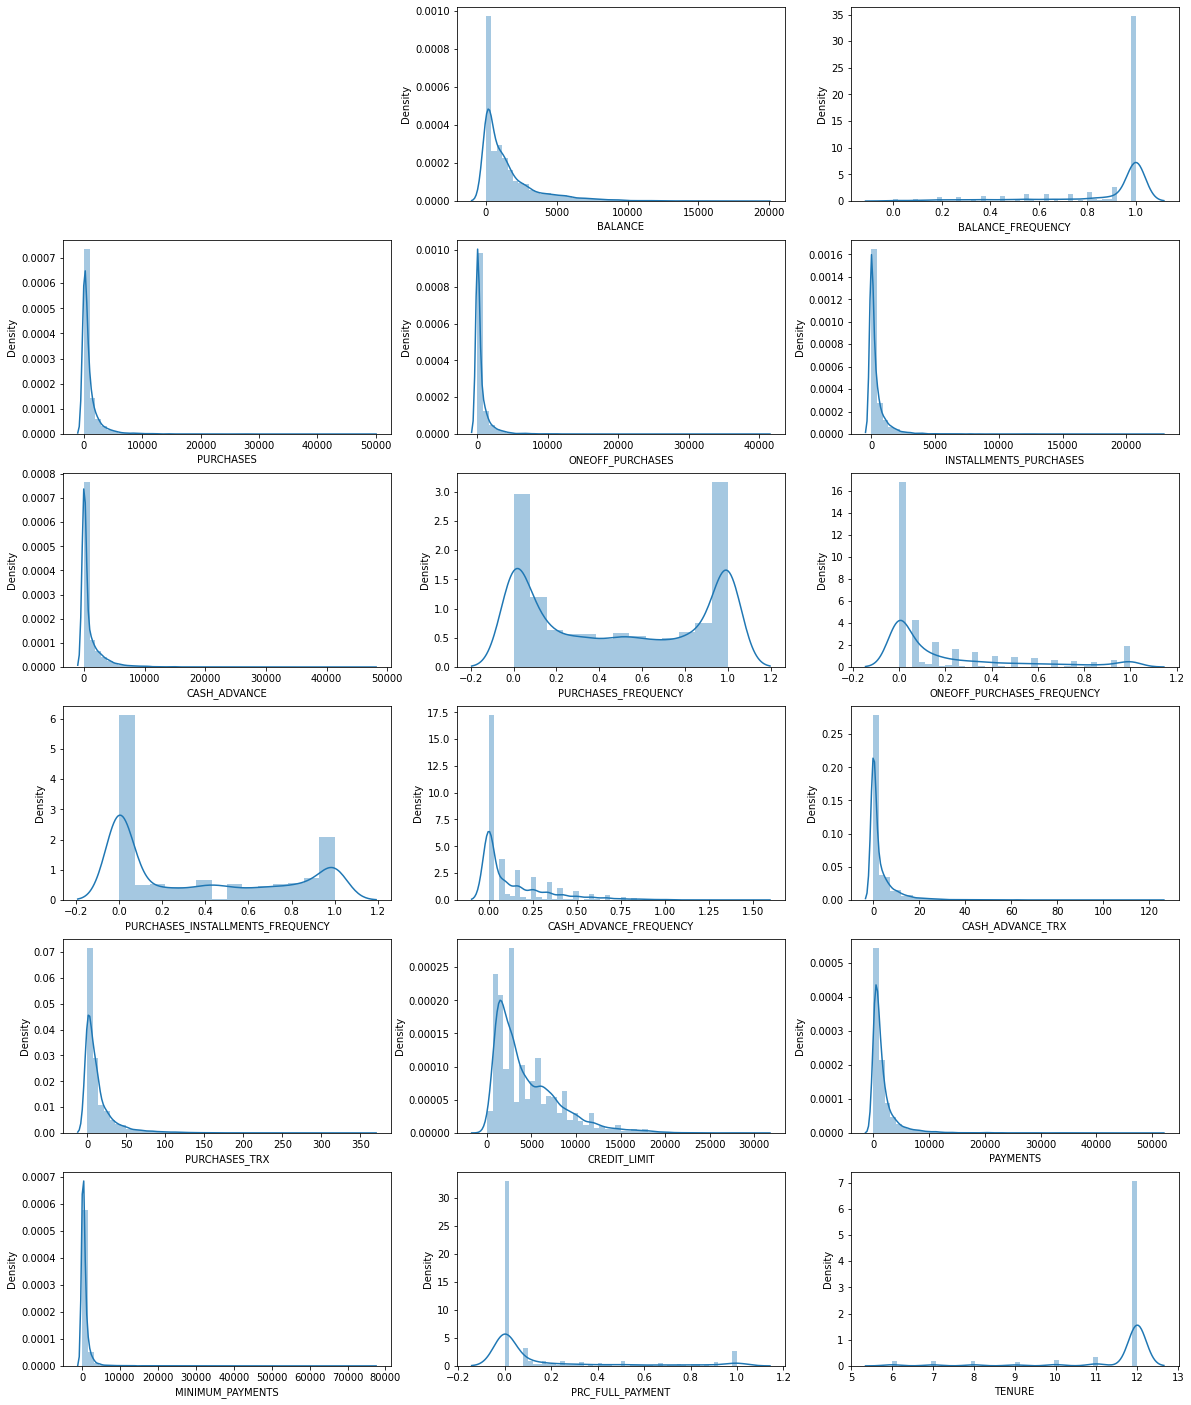

In [14]:
# Visualizing skewness

plt.figure(figsize=(20,25))
for i, col in enumerate(dfc.columns):
    if dfc[col].dtype != 'object':
        ax = plt.subplot(6, 3, i+1)
        sns.distplot(dfc[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

* From the above plots you can see the data is skewed.

<AxesSubplot:>

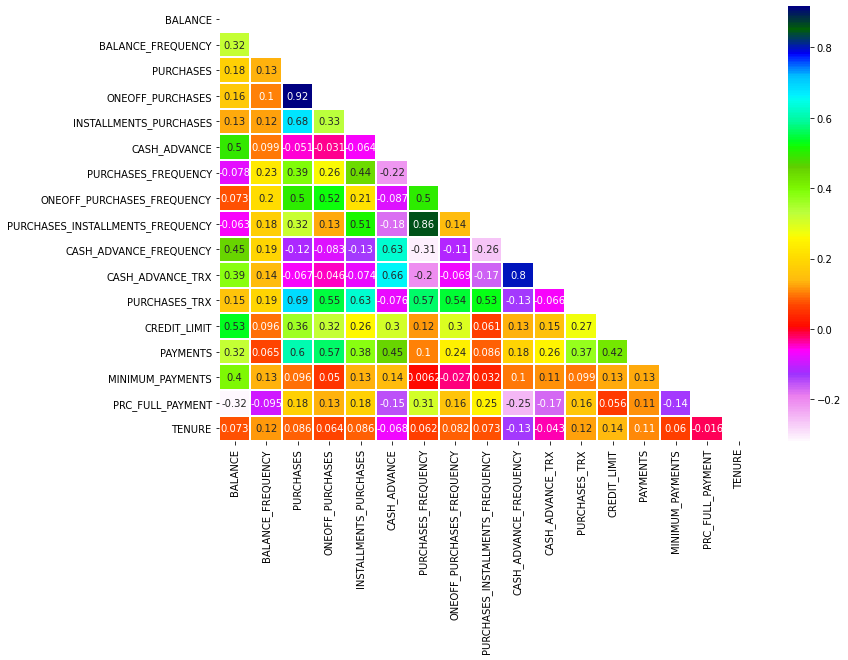

In [15]:
plt.figure(figsize=(12,8))
mask =  np.triu(np.ones_like(dfc.corr()))
sns.heatmap(dfc.corr(),mask=mask,annot=True,cmap='gist_ncar_r',linewidth=0.2)

**Insights:**
* 'PURCHASES' & 'ONEOFF_PURCHASES' are highly correlated.
* 'PURCHASES_INSTALLMENTS_FREQUENCY' & 'PURCHASES_FREQUENCY' are highly correlated.
* 'CASH_ADVANCE_FREQUENCY' & 'CASH_ADVANCE_TRX' are highly correlated.

So, we can drop any one column from each pair of the above columns but instead we will transform our data using PCA that will reduce the dimensionality of the data since, clustering is not much affected by collinearity. 
For the better understanding jump on to:
https://stats.stackexchange.com/questions/62253/do-i-need-to-drop-variables-that-are-correlated-collinear-before-running-kmeans

In [16]:
#dfc.drop(columns=[ 'ONEOFF_PURCHASES', 'PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY'],inplace=True)

In [17]:
print(dfc.columns)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [18]:
# Dropping 'CUST_ID' because we don't need it.
dfc.drop(['CUST_ID'],inplace=True,axis=1)

#### Log Transformation

In [19]:
#columns = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
#           'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
#           'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
#for i in columns:
#    dfc[i] = np.log(dfc[i]+1)  #we are adding 1 so that if any column has value 0 then it will not result in undefined value.
    

In [20]:
#plt.figure(figsize=(20,15))
#for i,col in enumerate(columns):
#        ax = plt.subplot(4, 5, i+1)
#        sns.distplot(dfc[col], ax=ax)
#plt.show()

#### Standard Scaler

In [21]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(dfc)
#dfc_scaled = scaler.transform(dfc)

I didn't use log transformation and standard scaling because these were decreasing my silhouette value.

#### PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
dfc_pca = pca.fit_transform(dfc)

In [23]:
dfc_pca.shape

(8950, 1)

### KMeans

Text(0, 0.5, 'WCSS')

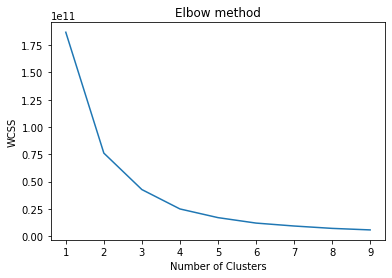

In [24]:
from sklearn.cluster import KMeans

'''innertia=[]
km=[]
for i in range (1,10):
    kmeans = KMeans(n_clusters=i,random_state=23).fit(dfc)
    km.append(kmeans)
    inertia = kmeans.inertia_
    innertia.append(inertia)'''

kmeans = [KMeans(n_clusters=k, random_state=23).fit(dfc_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans]
plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

* Elbow seems to be at 2 or 3 

Text(0, 0.5, 'Silhoutte score')

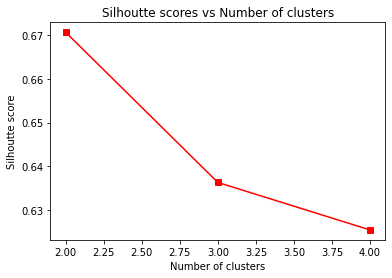

In [25]:
from sklearn.metrics import silhouette_score


'''silhoutte_score=[]
for i in km:
    sil_score = silhouette_score(dfc,i.labels_) 
    silhoutte_score.append(sil_score)'''

silhoutte_score = [silhouette_score(dfc_pca,model.labels_) for model in kmeans[1:4]]
plt.plot(range(2,5), silhoutte_score, "rs-")
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')

* Silhouette value is highest when there are 2 clusters.

#### Kmeans Model Evaluation

In [26]:
km=KMeans(n_clusters=2, random_state=23)
km.fit(dfc_pca)
sl_score=silhouette_score(dfc_pca,km.labels_)
print('Silhouette Score for the model is: ',sl_score)

Silhouette Score for the model is:  0.6706467433747163


### Heirarichal Clustering (Agglomerative)

Text(0, 0.5, 'Euclidean Distance')

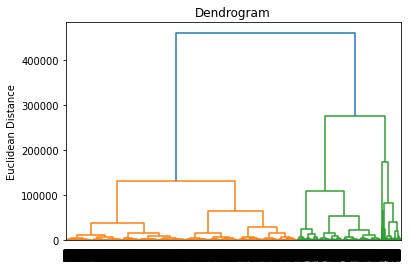

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

lin=linkage(dfc_pca,method='ward')
dgram=dendrogram(lin)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [28]:
agc=AgglomerativeClustering(n_clusters=2)
agc.fit(dfc_pca)
sl_score_agc=silhouette_score(dfc_pca,agc.labels_)
print('Silhouette Score for the model is: ',sl_score_agc)

Silhouette Score for the model is:  0.6335522326670113


### DBSCAN Clustering

In [29]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=900,min_samples=3,metric='euclidean')
dbs.fit(dfc_pca)
dbs_label=dbs.labels_
print(dbs_label)

[0 0 0 ... 0 0 0]


* Negative labels show noisy datapoints

In [30]:
from sklearn import metrics
sample_cores=np.zeros_like(dbs_label,dtype=bool)
sample_cores[dbs.core_sample_indices_]=True
n_clusters=len(set(dbs_label))- (1 if -1 in dbs_label else 0)
print('No of clusters:',n_clusters)

No of clusters: 2


In [31]:
sl_score_dbs=silhouette_score(dfc_pca,dbs_label)
print('Silhouette Score for the model is: ',sl_score_dbs)


Silhouette Score for the model is:  0.8536057890421923


* Sometimes we get negative silhouette score that shows the points which are misclassified.

In [32]:
#for i in columns:
#    dfc[i]= np.exp(dfc[i])

In [33]:
dfc['cluster_ID_KM']=km.labels_
dfc['cluster_ID_AG']=agc.labels_
dfc['cluster_ID_DB']=dbs_label
dfc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_ID_KM,cluster_ID_AG,cluster_ID_DB
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,1,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,0,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,12,0,0,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0,1,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,299.351881,0.000000,6,0,1,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,1,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0,1,0


In [34]:
dfc.cluster_ID_KM.value_counts()

0    7200
1    1750
Name: cluster_ID_KM, dtype: int64

In [35]:
dfc.cluster_ID_AG.value_counts()

1    6189
0    2761
Name: cluster_ID_AG, dtype: int64

In [36]:
dfc.cluster_ID_DB.value_counts()

 0    8935
-1      11
 1       4
Name: cluster_ID_DB, dtype: int64

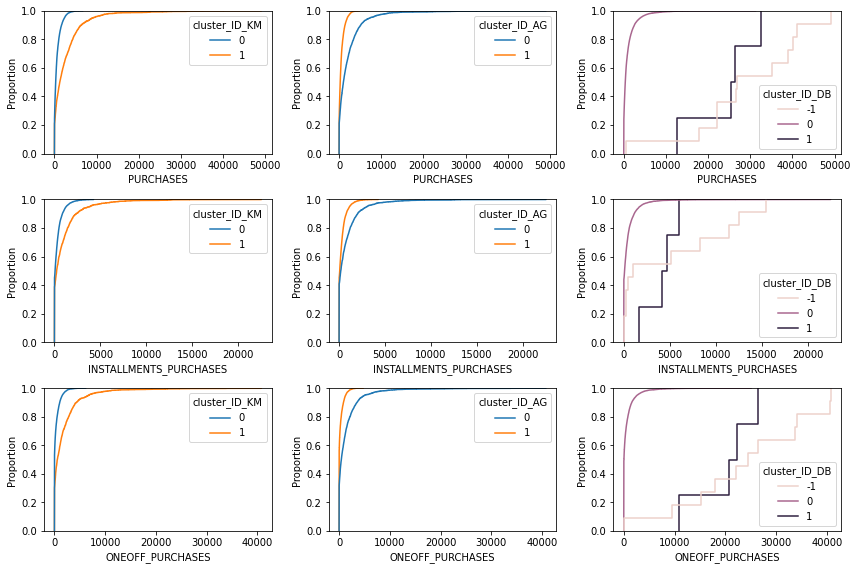

In [50]:
fig,axes = plt.subplots(3,3,figsize=(12,8))
sns.ecdfplot(data=dfc, x='PURCHASES',hue='cluster_ID_KM',ax=axes[0,0])
sns.ecdfplot(data=dfc, x='PURCHASES',hue='cluster_ID_AG',ax=axes[0,1])
sns.ecdfplot(data=dfc, x='PURCHASES',hue='cluster_ID_DB',ax=axes[0,2])
sns.ecdfplot(data=dfc, x='INSTALLMENTS_PURCHASES',hue='cluster_ID_KM',ax=axes[1,0])
sns.ecdfplot(data=dfc, x='INSTALLMENTS_PURCHASES',hue='cluster_ID_AG',ax=axes[1,1])
sns.ecdfplot(data=dfc, x='INSTALLMENTS_PURCHASES',hue='cluster_ID_DB',ax=axes[1,2])
sns.ecdfplot(data=dfc, x='ONEOFF_PURCHASES',hue='cluster_ID_KM',ax=axes[2,0])
sns.ecdfplot(data=dfc, x='ONEOFF_PURCHASES',hue='cluster_ID_AG',ax=axes[2,1])
sns.ecdfplot(data=dfc, x='ONEOFF_PURCHASES',hue='cluster_ID_DB',ax=axes[2,2])
plt.tight_layout(pad=1)

Insights:
1. In KMeans model cluster ID 0 represents the people who have overall low purchases be it installment or one-off.
2. In KMeans model cluster ID 1 represents the people who have overall high purchases be it installment or one-off. 
3. In Heirarchical model cluster ID 1 represents the people who have overall low purchases be it installment or one-off.
4. In Heirarchical model cluster ID 0 represents the people who have overall high purchases be it installment or one-off.
5. In DBSCAN model cluster ID 0 represents the people who have overall low purchases be it installment or one-off.
6. In DBSCAN model cluster ID 1 represents the people who have overall high purchases be it installment or one-off.
7. -1 represents the misclassified points.

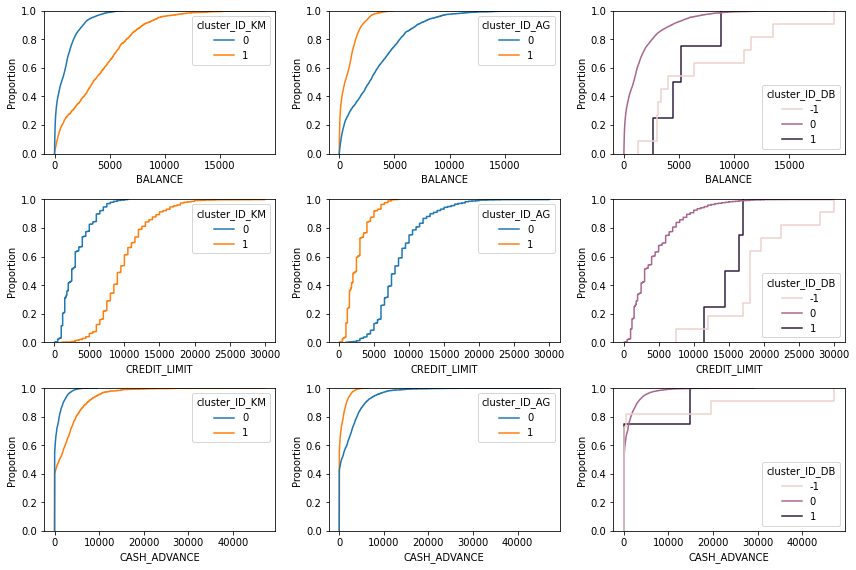

In [52]:
fig,axes = plt.subplots(3,3,figsize=(12,8))
sns.ecdfplot(data=dfc, x='BALANCE',hue='cluster_ID_KM',ax=axes[0,0])
sns.ecdfplot(data=dfc, x='BALANCE',hue='cluster_ID_AG',ax=axes[0,1])
sns.ecdfplot(data=dfc, x='BALANCE',hue='cluster_ID_DB',ax=axes[0,2])
sns.ecdfplot(data=dfc, x='CREDIT_LIMIT',hue='cluster_ID_KM',ax=axes[1,0])
sns.ecdfplot(data=dfc, x='CREDIT_LIMIT',hue='cluster_ID_AG',ax=axes[1,1])
sns.ecdfplot(data=dfc, x='CREDIT_LIMIT',hue='cluster_ID_DB',ax=axes[1,2])
sns.ecdfplot(data=dfc, x='CASH_ADVANCE',hue='cluster_ID_KM',ax=axes[2,0])
sns.ecdfplot(data=dfc, x='CASH_ADVANCE',hue='cluster_ID_AG',ax=axes[2,1])
sns.ecdfplot(data=dfc, x='CASH_ADVANCE',hue='cluster_ID_DB',ax=axes[2,2])
plt.tight_layout(pad=1)

Insights:
1. In KMeans model cluster ID 0 represents the people who have low balance and also they use credit card less frequently.
2. In KMeans model cluster ID 1 represents the people who have high balance and also they use credit card more frequently. 
3. In Heirarchical model cluster ID 1 represents the people who have low balance and also they use credit card less frequently.
4. In Heirarchical model cluster ID 0 represents the people who have high balance and also they use credit card more frequently.
5. In DBSCAN model cluster ID 0 represents the people who have low balance and also they use credit card less frequently.
6. In DBSCAN model cluster ID 1 represents the people who have high balance and also they use credit card more frequently.
7. -1 represents the misclassified points.

Text(0.5, 1.0, 'Distribution using KMeans Model of clusters based on INSTALLMENT PURCHASES and total purchases')

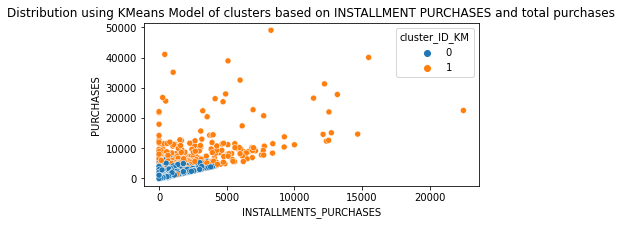

In [48]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=dfc, x='INSTALLMENTS_PURCHASES', y='PURCHASES', hue='cluster_ID_KM')
plt.title('Distribution using KMeans Model of clusters based on INSTALLMENT PURCHASES and total purchases')

Text(0.5, 1.0, 'Distribution using KMeans Model of clusters based on Credit Limit and total purchases')

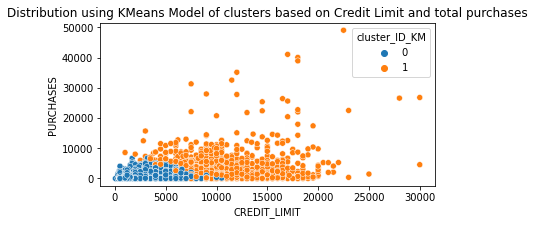

In [39]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=dfc, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_ID_KM')
plt.title('Distribution using KMeans Model of clusters based on Credit Limit and total purchases')


Text(0.5, 1.0, 'Distribution of using Heirarichal Model clusters based on INSTALLMENT PURCHASES and total purchases')

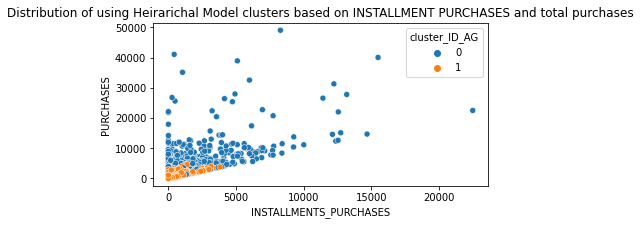

In [40]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=dfc, x='INSTALLMENTS_PURCHASES', y='PURCHASES', hue='cluster_ID_AG')
plt.title('Distribution of using Heirarichal Model clusters based on INSTALLMENT PURCHASES and total purchases')

Text(0.5, 1.0, 'Distribution of using Heirarichal Model clusters based on Credit Limit and total purchases')

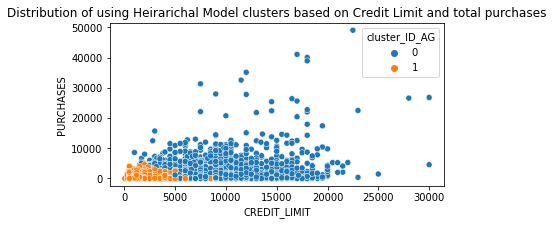

In [41]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=dfc, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_ID_AG')
plt.title('Distribution of using Heirarichal Model clusters based on Credit Limit and total purchases')

Text(0.5, 1.0, 'Distribution using DBSCAN Model of clusters based on INSTALLMENT PURCHASES and total purchases')

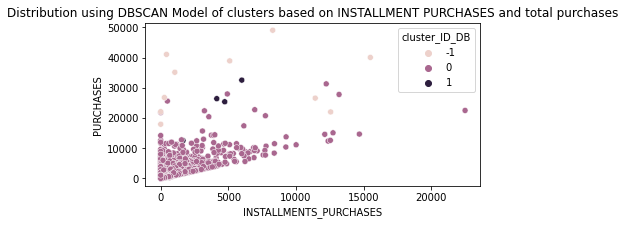

In [42]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=dfc, x='INSTALLMENTS_PURCHASES', y='PURCHASES', hue='cluster_ID_DB')
plt.title('Distribution using DBSCAN Model of clusters based on INSTALLMENT PURCHASES and total purchases')

Text(0.5, 1.0, 'Distribution using DBSCAN Model of clusters based on Credit Limit and total purchases')

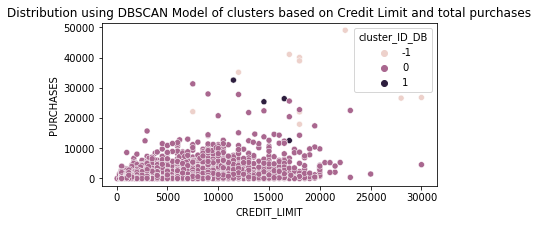

In [43]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=dfc, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_ID_DB')
plt.title('Distribution using DBSCAN Model of clusters based on Credit Limit and total purchases')

**Conclusion:**
* DBSCAN model is found to be the best among all three with highest silhouette value.
* People with high balance and high purchases are found to be very less in number.
